In [1]:
# setup the presentation settings
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'start_slideshow_at': 'selected',
              'transition': 'fade'
})

{'start_slideshow_at': 'selected', 'theme': 'serif', 'transition': 'fade'}

In [2]:
# some good ol' imports
import pandas as pd, numpy as np
from emperor import Emperor, nbinstall
from skbio import OrdinationResults

from emperor.qiime_backports.parse import parse_mapping_file
from emperor.qiime_backports.format import format_mapping_file

from skbio.io.util import open_file

nbinstall()

def load_mf(fn):
    with open_file(fn) as f:
        mapping_data, header, _ = parse_mapping_file(f)
        _mapping_file = pd.DataFrame(mapping_data, columns=header)
        _mapping_file.set_index('SampleID', inplace=True)
    return _mapping_file

def write_mf(f, _df):
    with open(f, 'w') as fp:
        lines = format_mapping_file(['SampleID'] + _df.columns.tolist(),
                                    list(_df.itertuples()))
        fp.write(lines+'\n')

In [3]:
def one_more_thing():
    return 'We are hiring, contact robknight@ucsd.edu'

# Emperor: interactive $\beta$-diversity visualization

In [ ]:
# @ElDeveloper on GitHub
__presenter__ = 'Yoshiki Vazquez-Baeza'
__email__ = 'yoshiki@ucsd.edu'


__license__ = 'BSD-3'
__url__ = 'https://github.com/biocore/emperor'

<table style='border:none; width:100%;' cellspacing="0" cellpadding="0">
<tr style='border:none;'>
<td style='border:none;'>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/UCSD_logo.png" alt="ucsd" style="height: 50px;"/>
</td>
<td style='border:none;'>
<img src="./images/knight-logo.png" alt="knight-lab" style="height: 100px;"/>
</td>
</tr>
</table>

# Outline

- Background (why $\beta$-diversity).

- What is Emperor.

- How can we use Emperor.
    
- Analyzing a use case.

# Outline

- **Background (why $\beta$-diversity).**

- What is Emperor.

- How can we use Emperor.
    
- Analyzing a use case.

# Microscopic worlds on and inside our bodies

<img src='http://news.nationalgeographic.com/content/dam/news/photos/000/819/81998.ngsversion.1422281191282.adapt.1900.1.jpg' style='height:500px'>

Photograph by Martin Oeggerli, Micronaut, Supported by School of Life Sciences.

# How do we make sense out of them?

![microbe](./images/microbes.png)

# How do we make sense out of them?

![microbe](./images/microbes-metric.png)

# What is $\beta$-diversity

- Comparison of two individual communities to determine how similar they are.

<img src="./images/table-2.png" alt="ucsd" style="height: 500px;"/>

# What is $\beta$-diversity

- Comparison of two individual communities to determine how similar they are.

<img src="./images/distance-matrix.png" alt="dm"/>

# What is $\beta$-diversity

- Comparison of two individual samples to determine how similar they are.
- Elucidate patterns.

![costello](./images/costello.png)

<p><small>
    Bacterial community variation in human body habitats across space and time.
    Costello EK et al. 2009.
</small></p>

# What is $\beta$-diversity

- Comparison of two individual samples to determine how similar they are.
- Elucidate patterns.

![costello](./images/costello-colored.png)

<p><small>
    Bacterial community variation in human body habitats across space and time.
    Costello EK et al. 2009.
</small></p>

# What is $\beta$-diversity

- Comparison of two individual samples to determine how similar they are.
- Elucidate patterns.

![costello](./images/costello-all.png)

<p><small>
    Bacterial community variation in human body habitats across space and time.
    Costello EK et al. 2009.
</small></p>

In [4]:
from skbio import OrdinationResults

coordinates = OrdinationResults.read('costello/unweighted_unifrac_pc.txt')
metadata = load_mf('costello/mapping-file.txt')

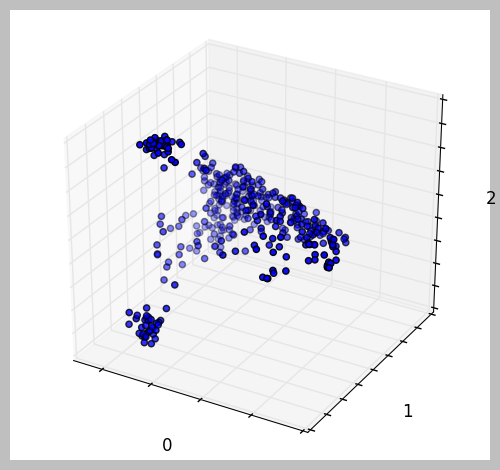

In [6]:
coordinates

<div style='height:500px'></div>

In [7]:
from emperor import Emperor

In [8]:
Emperor(coordinates, metadata, remote=False)

<!-- RISE has some scrolling bugs, so we pre-allocate some space to display the emperor plot -->
<div style='height:500px'></div>

# Outline

- ~~Background (why $\beta$-diversity).~~

- **What is Emperor.**

- How can we use Emperor.
    
- Analyzing a use case.

# What is Emperor?

- A Python 2/3 package that powers a JavaScript UI.
    - https://github.com/biocore/emperor
    
- Originated in the context of Quantitative Insights Into Microbial Ecology http://2.qiime.org

- Scatter plot viewer.

    - Visualize
    - Interact
    - Share

# Other applications

- Qiita
    - https://qiita.ucsd.edu
    ![qiita](https://raw.githubusercontent.com/biocore/qiita/master/qiita_pet/static/img/logo.png)

- American Gut (participant's results).
    - http://americangut.org/
    <img src='https://lh4.googleusercontent.com/88tkWe8K-u_ZUgO3GVIrnDSeJE65QGHOlCY_-WQ3mFxmmskkxEZGEmj6GxYilVe5f5gnEx2K_EdOZngTeY750V4rtNLt0n5rVA6pj1ow9oFHltwYlbQ' style='height:80px'></img>

- Illumina's BaseSpace processing results for the QIIME app.
- Metabolomic analysis, IPython notebook ...

    ... kinda

# Kinda?

- https://github.com/jupyter/nbviewer/issues/316

<img src='./images/glitch.gif' style='height:500px;'>

# Nowadays

- Python API.
    - Python 2 and 3.
    - Integration with scikit-bio.
    - Jupyter integration.
    - Pandas 🐼 Integration.

- JavaScript API.

- Command Line Interface (powered by QIIME 2).

# Outline

- ~~Background (why $\beta$-diversity).~~

- ~~What is Emperor.~~

- **How can we use Emperor**.
    
- Analyzing a use case.

# Python

- 1 main class `Emperor`, depends on `scikit-bio` and `pandas`.

- Format Python data into JSON and display it using JavaScript.

In [9]:
from emperor import Emperor

Emperor?

<div style='height:500px'></div>

# http://emperor.microbio.me/uno/

![emperor](./images/main-doc.png)

# http://emperor.microbio.me/uno/

![emperor](./images/python-doc.png)

# http://emperor.microbio.me/uno/

![emperor](./images/python-doc-2.png)

# 🐼s integration - experimental

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('./tips.csv')

In [12]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


<div style='height:500px'></div>

# 🐼s integration - experimental

- Coordinates are inferred from the numerical data, see additional `x`, `y` and `z` parameters.

In [13]:
from emperor import scatterplot
scatterplot(df, remote=False)

<div style='height:500px'></div>

# Outline

- ~~Background (why $\beta$-diversity).~~

- ~~What is Emperor.~~

- **How can we use Emperor.**
    
- Analyzing a use case.

# Emperor and Jupyter 📓

- nbviewer
    See the examples folder in our repo: https://github.com/biocore/emperor/tree/new-api/examples

- Jupyter notebook

- Standalone HTML plot
    - Generate a standalone HTML file with the needed resources.

<div style='height:500px'></div>

# JavaScript

- Isn't this Sci**Py**.

    SciJS?

- Thoroughly unit tested.

- Public API ready to be used:

    http://emperor.microbio.me/uno/build/jsdoc/index.html

# JavaScript

![JS-DOC](./images/js-doc.png)

# JavaScript

- Integration with SAGE2:

    http://sage2.sagecommons.org/

<div style='height:500px'></div>

# JavaScript

- Integration with SAGE2:

    http://sage2.sagecommons.org/

![sage](./images/vroom.png)

# QIIME 2 integration

- 1.5 hours to implement.

- In less than 80 lines of code we got a CLI, GUI and provenance tracking.

- Consider QIIME 2 as a gateway to an expanded user base.

- CLI Provided through QIIME 2

    https://github.com/qiime2/qiime2
    
    https://github.com/qiime2/q2-emperor/

```bash
qiime emperor plot --help
```

# Outline

- ~~Background (why $\beta$-diversity).~~

- ~~What is Emperor.~~

- ~~How can we use Emperor.~~
    
- **Analyzing a use case.**

# Use case

- Let's leverage the technology we have available.

- Create a small interface to:

    - Subsample.
    - Compute a distance matrix.
        * Use all the cores in our machine.
    - Visualize.
    
    - This was kinda possible through E-vident https://github.com/biocore/evident

In [14]:
# biocore
from emperor.qiime_backports.parse import parse_mapping_file
from emperor import Emperor, nbinstall

nbinstall()

from skbio.stats.ordination import pcoa
from skbio.diversity import beta_diversity
from skbio import TreeNode
from skbio.io.util import open_file

from biom import load_table
from biom.util import biom_open

import qiime_default_reference

# pydata/scipy
import pandas as pd
import numpy as np

from scipy.spatial.distance import braycurtis, canberra
from ipywidgets import interact
from sklearn.metrics import pairwise_distances
from functools import partial

In [15]:
import warnings
# don't try this at home
warnings.filterwarnings(action='ignore', category=Warning)

# -1 means all the processors available
pw_dists = partial(pairwise_distances, n_jobs=-1)

def load_mf(fn):
    with open_file(fn) as f:
        mapping_data, header, _ = parse_mapping_file(f)
        _mapping_file = pd.DataFrame(mapping_data, columns=header)
        _mapping_file.set_index('SampleID', inplace=True)
    return _mapping_file

# Load the data (table and tree)

In [16]:
mf = load_mf('keyboard/mapping-file.txt')
bt = load_table('keyboard/otu-table.biom')

In [17]:
tree = TreeNode.read(qiime_default_reference.get_reference_tree())

for n in tree.traverse():
    if n.length is None:
        n.length = 0

# Interaction function

In [18]:
def evident(n, metric):
    rarefied = bt.subsample(n)
    data = np.array([rarefied.data(i) for i in rarefied.ids()], dtype='int64')
    
    # phylogenetic
    if metric in ['unweighted_unifrac', 'weighted_unifrac']:
        res = pcoa(beta_diversity(metric, data, rarefied.ids(),
                                  otu_ids=rarefied.ids('observation'),
                                  tree=tree, pairwise_func=pw_dists))
    # non-phylogenetic
    else:
        res = pcoa(beta_diversity(metric, data, rarefied.ids(),
                                  pairwise_func=pw_dists))
    return Emperor(res, mf, remote=True)

In [19]:
interact(evident, n=(200, 2000, 50),
         metric=['unweighted_unifrac', 'weighted_unifrac', 'braycurtis', 'euclidean'],
         __manual=True)

<div style='height:500px'></div>

# Summarizing

Ready to be used!

In [20]:
print(b'\xF0\x9F\x91\x8D'.decode('utf-8'))

👍


## version 1.0 $\beta$ is out!

```bash
pip install jupyter
pip install emperor --pre


conda install -c biocore emperor jupyter
```

# Acknowledments

- Thanks to all our users (**cited 99 times since 2013**)

In [ ]:
from knightlab.members import current
from knightlab.members import past
from caporasolab.members import current as c_current

__credits__ = ['Antonio Gonzalez', 'Joshua Shorenstein', 'Jamie Morton',
               'Jose Navas', 'Rob Knight'] + current + past + c_current

In [21]:
one_more_thing()

'We are hiring, contact robknight@ucsd.edu'

<table style='border:none; width:100%;' cellspacing="0" cellpadding="0">
<tr style='border:none;'>
<td style='border:none;'>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/UCSD_logo.png" alt="ucsd" style="height: 50px;"/>
</td>
<td style='border:none;'>
<img src="./images/knight-logo.png" alt="knight-lab" style="height: 100px;"/>
</td>
</tr>
</table>